# Cleaning - EDA

In [326]:
import pandas as pd
import numpy as np

In [327]:
df=pd.read_csv('data/MLE Challenge.csv',sep = ';',engine='python')

In [328]:
df.head()

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,"608,3456335",21/01/2020,20,{'model': 2020; 'device_score': 3; 'os': 'ANDR...,Super,Merida,FÃ­sica,71000,51,Aceptada,False,"60,83456335","5,475110702",False
1,0,F,"88,71924289",15/01/2020,7,{'model': 2020; 'device_score': 1; 'os': 'ANDR...,NaN,Merida,Virtual,71000,51,Aceptada,False,0,"1,774384858",False
2,1,F,"790,0376533",17/01/2020,11,"{'model': 2020; 'device_score': 1; 'os': ','}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0,"15,80075307",False
3,1,F,"767,0053873",5/01/2020,11,{'model': 2020; 'device_score': 3; 'os': 'WEB'},MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"7,670053873",False
4,1,F,"254,1710526",30/01/2020,10,{'model': 2020; 'device_score': 3; 'os': '%%'},NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"2,541710526",False


### Convert column with data in dictionary format to single column format

In [329]:
df2=df['dispositivo'].str.split(';', expand=True)

In [330]:
df2.columns= ['modelo','device_score','os']

In [331]:
def get_numbers(row):
    res = [int(i) for i in str(row).split() if i.isdigit()]
    return res[0]
def get_numbers_2(row):
    res = [int(i) for i in str(row).split() if i.isdigit()]
    return res[1]
def find_sub(text):
    text=text[2]

    
    text = str(text).replace("os': '",'')
    text = text.replace("}",'')
    text = str(text).replace("'",'')
    text = str(text).replace(" ",'')
    text = str(text).replace(",",'')
    text = str(text).replace("%%","")
    

    return text

In [332]:
df2['modelo']=df2.apply(get_numbers,axis=1)
df2['device_score']=df2.apply(get_numbers_2,axis=1)


In [333]:
df2['os']=df2.apply(find_sub,axis=1)
df2 = df2.replace(r'^\s*$', np.NaN, regex=True)

In [334]:
df2

,modelo,device_score,os
0,2020,3,ANDROID
1,2020,1,ANDROID
2,2020,1,NaN
3,2020,3,WEB
4,2020,3,NaN
...,...,...,...
26970,2020,2,ANDROID
26971,2020,2,WEB
26972,2020,2,WEB
26973,2020,5,NaN


In [346]:
data = pd.concat([df, df2], axis=1)
data.drop(['dispositivo','ID_USER','modelo'],axis=1,inplace=True)

# #Data exploration , variables type

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

'%matplotlib inline'


'%matplotlib inline'

In [348]:
data.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os
0,F,"608,3456335",21/01/2020,20,Super,Merida,FÃ­sica,71000,51,Aceptada,False,"60,83456335","5,475110702",False,3,ANDROID
1,F,"88,71924289",15/01/2020,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0,"1,774384858",False,1,ANDROID
2,F,"790,0376533",17/01/2020,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0,"15,80075307",False,1,NaN
3,F,"767,0053873",5/01/2020,11,MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"7,670053873",False,3,WEB
4,F,"254,1710526",30/01/2020,10,NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"2,541710526",False,3,NaN


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   genero           26975 non-null  object
 1   monto            26975 non-null  object
 2   fecha            26975 non-null  object
 3   hora             26975 non-null  int64 
 4   establecimiento  16856 non-null  object
 5   ciudad           15297 non-null  object
 6   tipo_tc          26975 non-null  object
 7   linea_tc         26975 non-null  int64 
 8   interes_tc       26975 non-null  int64 
 9   status_txn       26975 non-null  object
 10  is_prime         26975 non-null  bool  
 11  dcto             26975 non-null  object
 12  cashback         26975 non-null  object
 13  fraude           26975 non-null  bool  
 14  device_score     26975 non-null  int64 
 15  os               13452 non-null  object
dtypes: bool(2), int64(4), object(10)
memory usage: 2.9+ MB


### Formatting variables

In [350]:
data['genero'] = pd.Categorical(data.genero)
data['establecimiento'] = pd.Categorical(data.establecimiento)
data['ciudad'] = pd.Categorical(data.ciudad)
data['tipo_tc'] = pd.Categorical(data.tipo_tc)
data['status_txn'] = pd.Categorical(data.status_txn)
data['os'] = pd.Categorical(data.os)
data['device_score'] = pd.Categorical(data.device_score)

In [351]:
def add_one(x):
    number = x.replace(",",'.')
    return number
data["cashback"] = data["cashback"].apply(add_one)
data['cashback'] = data['cashback'].astype(float)
data["dcto"] = data["dcto"].apply(add_one)
data['dcto'] = data['dcto'].astype(float)
data["monto"] = data["monto"].apply(add_one)
data['monto'] = data['monto'].astype(float)

In [352]:
data.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os
0,F,608.345633,21/01/2020,20,Super,Merida,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID
1,F,88.719243,15/01/2020,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID
2,F,790.037653,17/01/2020,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,NaN
3,F,767.005387,5/01/2020,11,MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB
4,F,254.171053,30/01/2020,10,NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False,3,NaN


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   genero           26975 non-null  category
 1   monto            26975 non-null  float64 
 2   fecha            26975 non-null  object  
 3   hora             26975 non-null  int64   
 4   establecimiento  16856 non-null  category
 5   ciudad           15297 non-null  category
 6   tipo_tc          26975 non-null  category
 7   linea_tc         26975 non-null  int64   
 8   interes_tc       26975 non-null  int64   
 9   status_txn       26975 non-null  category
 10  is_prime         26975 non-null  bool    
 11  dcto             26975 non-null  float64 
 12  cashback         26975 non-null  float64 
 13  fraude           26975 non-null  bool    
 14  device_score     26975 non-null  category
 15  os               13452 non-null  category
dtypes: bool(2), category(7), float64(3), int

In [354]:
data.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os
0,F,608.345633,21/01/2020,20,Super,Merida,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID
1,F,88.719243,15/01/2020,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID
2,F,790.037653,17/01/2020,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,NaN
3,F,767.005387,5/01/2020,11,MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB
4,F,254.171053,30/01/2020,10,NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False,3,NaN


In [355]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [356]:
data['dia']=data['fecha'].dt.day_name()

In [357]:
data.head()

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os,dia
0,F,608.345633,2020-01-21,20,Super,Merida,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,Tuesday
1,F,88.719243,2020-01-15,7,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID,Wednesday
2,F,790.037653,2020-01-17,11,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,NaN,Friday
3,F,767.005387,2020-05-01,11,MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,Friday
4,F,254.171053,2020-01-30,10,NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False,3,NaN,Thursday


### Describe continuous and categorical data

In [358]:
data.describe(include='all')

,genero,monto,fecha,hora,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,os,dia
count,26975,26975.000000,26975,26975.000000,16856,15297,26975,26975.000000,26975.000000,26975,26975,26975.000000,26975.000000,26975,26975.0,13452,26975
unique,3,NaN,29,NaN,5,4,2,NaN,NaN,3,2,NaN,NaN,2,5.0,2,7
top,M,NaN,2020-01-29 00:00:00,NaN,Restaurante,Toluca,FÃ­sica,NaN,NaN,Aceptada,False,NaN,NaN,False,4.0,WEB,Wednesday
freq,13519,NaN,977,NaN,3454,3997,18903,NaN,NaN,18844,23416,NaN,NaN,26165,5435.0,6766,4717
first,NaN,NaN,2020-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.069493,NaN,11.987618,NaN,NaN,NaN,62476.811863,48.224875,NaN,NaN,17.466134,6.261186,NaN,NaN,NaN,NaN
std,NaN,289.309518,NaN,6.642565,NaN,NaN,NaN,21886.892902,9.587256,NaN,NaN,34.334566,4.458440,NaN,NaN,NaN,NaN
min,NaN,0.017303,NaN,1.000000,NaN,NaN,NaN,25000.000000,32.000000,NaN,NaN,0.000000,0.000138,NaN,NaN,NaN,NaN
25%,NaN,246.521227,NaN,6.000000,NaN,NaN,NaN,44000.000000,40.000000,NaN,NaN,0.000000,2.791740,NaN,NaN,NaN,NaN


False    0.969972
True     0.030028
Name: fraude, dtype: float64


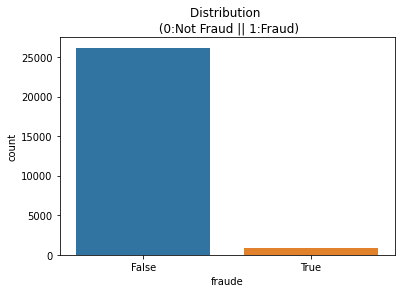

In [359]:
sns.countplot(data.fraude).set_title("Distribution \n (0:Not Fraud || 1:Fraud)")
print(data.fraude.value_counts(normalize=True))
plt.show()

In [360]:
print('Not Frauds :', round(data['fraude'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds :', round(data['fraude'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Not Frauds : 97.0 % of the dataset
Frauds : 3.0 % of the dataset


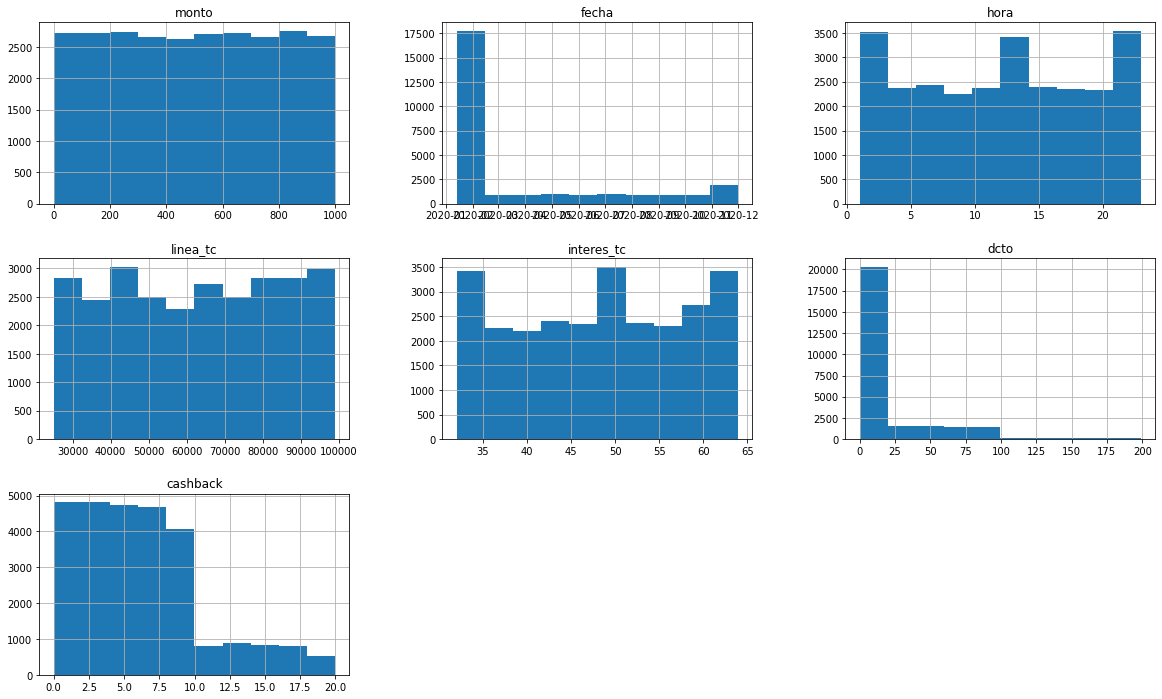

In [361]:
data.hist(figsize=(20,12))
plt.show()


In [362]:
#all the categorical columns with their values -
cols=data.describe(include="all").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(data[i].unique())
    print("")

Distinct_values :
 'column_name' = genero
['F', '--', 'M']
Categories (3, object): ['--', 'F', 'M']

Distinct_values :
 'column_name' = monto
[608.3456335   88.71924289 790.0376533  ... 251.1898853   24.1826647
 517.2092724 ]

Distinct_values :
 'column_name' = fecha
['2020-01-21T00:00:00.000000000' '2020-01-15T00:00:00.000000000'
 '2020-01-17T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-06-01T00:00:00.000000000' '2020-11-01T00:00:00.000000000'
 '2020-01-19T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-01-18T00:00:00.000000000' '2020-07-01T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-01-25T00:00:00.000000000' '2020-01-22T00:00:00.000000000'
 '2020-01-16T00:00:00.000000000' '2020-12-01T00:00:00.000000000'
 '2020-01-29T00:00:00.000000000' '2020-01-14T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-03-01T00:00:00.000000000'
 '2020-10-01T00:0

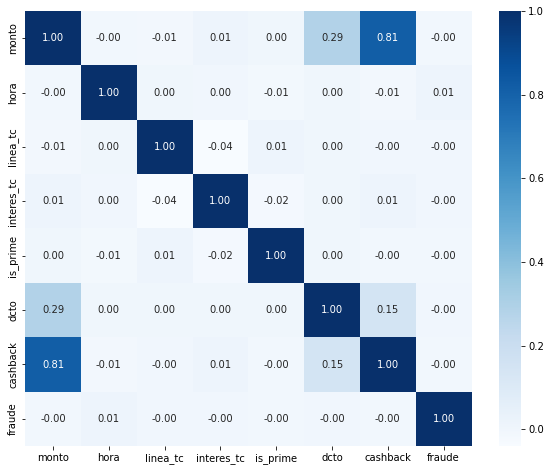

In [363]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

In [364]:
data.columns

Index(['genero', 'monto', 'fecha', 'hora', 'establecimiento', 'ciudad',
       'tipo_tc', 'linea_tc', 'interes_tc', 'status_txn', 'is_prime', 'dcto',
       'cashback', 'fraude', 'device_score', 'os', 'dia'],
      dtype='object')

In [365]:
data.to_csv("data_done.csv")

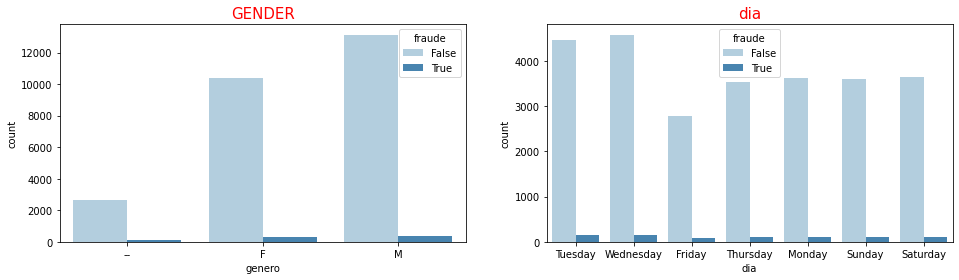

In [366]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(data["genero"],hue="fraude",data=data,palette="Blues")
plt.title("GENDER",fontsize=15,color="Red")
plt.subplot(122)
sns.countplot(data["dia"],hue="fraude",data=data,palette="Blues")
plt.title("dia",fontsize=15,color="Red")
plt.show()

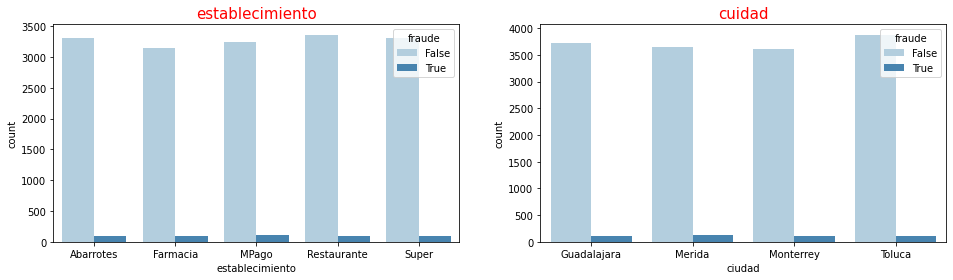

In [367]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(data["establecimiento"],hue="fraude",data=data,palette="Blues")
plt.title("establecimiento",fontsize=15,color="Red")
plt.subplot(122)
sns.countplot(data["ciudad"],hue="fraude",data=data,palette="Blues")
plt.title("cuidad",fontsize=15,color="Red")
plt.show()

In [373]:
data.drop(['establecimiento','ciudad'], axis=1,inplace= True)

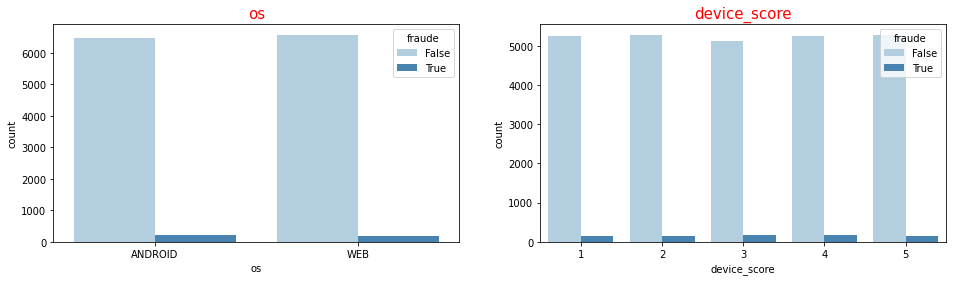

In [368]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(data["os"],hue="fraude",data=data,palette="Blues")
plt.title("os",fontsize=15,color="Red")

plt.subplot(122)
sns.countplot(data["device_score"],hue="fraude",data=data,palette="Blues")
plt.title("device_score",fontsize=15,color="Red")
plt.show()

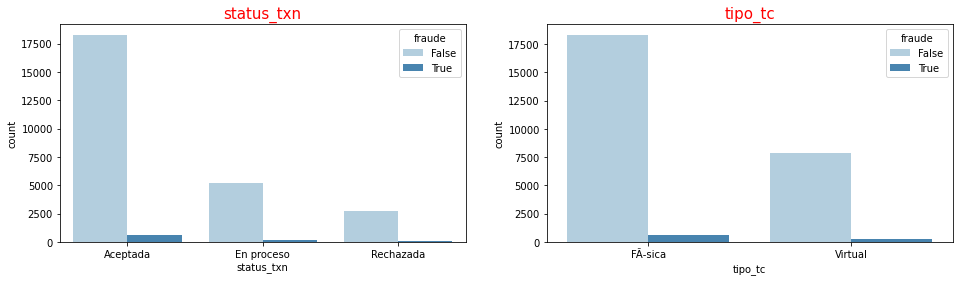

In [369]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(data["status_txn"],hue="fraude",data=data,palette="Blues")
plt.title("status_txn",fontsize=15,color="Red")
plt.subplot(122)
sns.countplot(data["tipo_tc"],hue="fraude",data=data,palette="Blues")
plt.title("tipo_tc",fontsize=15,color="Red")
plt.show()

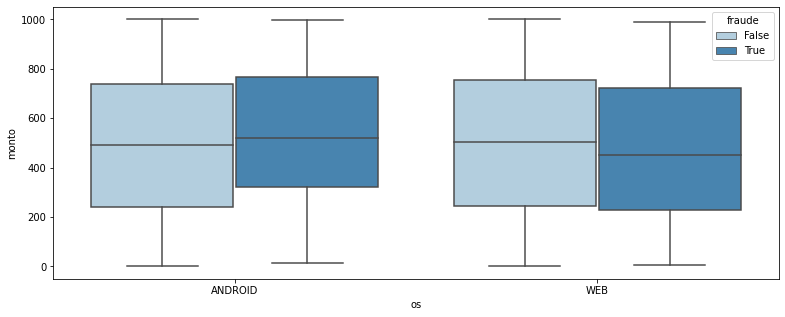

In [370]:
plt.figure(figsize=(13,5))
sns.boxplot(x="os",y="monto",data=data,hue="fraude",palette="Blues")
plt.show()

In [374]:
data.drop(['os'], axis=1,inplace= True)

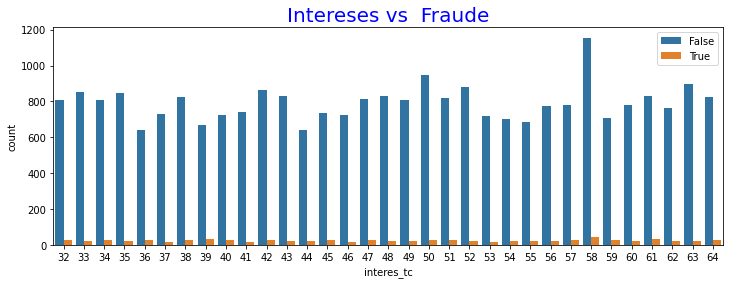

In [375]:
plt.figure(figsize=(12,4))
sns.countplot(data["interes_tc"],hue="fraude",data=data)
plt.title("Intereses vs  Fraude",fontsize=20,color="BLUE")
plt.legend()
plt.show()

In [202]:
#plt.figure(figsize=(12,4))
#sns.countplot(data["monto"],hue="fraude",data=data)
#plt.title("Monto vs  Fraude",fontsize=20,color="BLUE")
#plt.legend()
#plt.show()

In [376]:
data.isnull().sum()

genero          0
monto           0
fecha           0
hora            0
tipo_tc         0
linea_tc        0
interes_tc      0
status_txn      0
is_prime        0
dcto            0
cashback        0
fraude          0
device_score    0
dia             0
dtype: int64

In [377]:
data.head()

,genero,monto,fecha,hora,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,device_score,dia
0,F,608.345633,2020-01-21,20,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False,3,Tuesday
1,F,88.719243,2020-01-15,7,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,Wednesday
2,F,790.037653,2020-01-17,11,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,Friday
3,F,767.005387,2020-05-01,11,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False,3,Friday
4,F,254.171053,2020-01-30,10,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False,3,Thursday


In [378]:
data.to_csv("data_done.csv")

In [379]:
data.columns

Index(['genero', 'monto', 'fecha', 'hora', 'tipo_tc', 'linea_tc', 'interes_tc',
       'status_txn', 'is_prime', 'dcto', 'cashback', 'fraude', 'device_score',
       'dia'],
      dtype='object')